## Option 2: Pymaceuticals Inc

![Laboratory](../Images/Laboratory.jpg)

While your data companions rushed off to jobs in finance and government, you remained adamant that science was the way for you. Staying true to your mission, you've since joined Pymaceuticals Inc., a burgeoning pharmaceutical company based out of San Diego, CA. Pymaceuticals specializes in drug-based, anti-cancer pharmaceuticals. In their most recent efforts, they've since begun screening for potential treatments to squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.

As their Chief Data Analyst, you've been given access to the complete data from their most recent animal study. In this study, 250 mice were treated through a variety of drug regimes over the course of 45 days. Their physiological responses were then monitored over the course of that time. Your objective is to analyze the data to show how four treatments (Capomulin, Infubinol, Ketapril, and Placebo) compare.

To do this you are tasked with:

* Creating a scatter plot that shows how the tumor volume changes over time for each treatment.
* Creating a scatter plot that shows how the number of [metastatic](https://en.wikipedia.org/wiki/Metastasis) (cancer spreading) sites changes over time for each treatment.
* Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)
* Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.

As final considerations:

* You must use the Pandas Library and the Jupyter Notebook.
* You must use Matplotlib for all plotting.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles, Axes Labels, Legend Labels, X and Y Axis Limits, etc.
* Your scatter plots must include [error bars](https://en.wikipedia.org/wiki/Error_bar). This will allow the company to account for variability between mice. You may want to look into [`pandas.DataFrame.sem`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sem.html) for ideas on how to calculate this.
* Remember when making your plots to consider aesthetics!
  * Your legends should not be overlaid on top of any data.
  * Your bar graph should indicate tumor growth as red and tumor reduction as green.
    It should also include a label with the percentage change for each bar. You may want to consult this [tutorial](http://composition.al/blog/2015/11/29/a-better-way-to-add-labels-to-bar-charts-with-matplotlib/) for relevant code snippets.
* You must include an exported markdown version of your Notebook called  `README.md` in your GitHub repository.
* See [Example Solution](Pymaceuticals_Example.pdf) for a reference on expected format. (Note: For this example, you are not required to match the tables or data frames included. Your only goal is to build the scatter plots and bar graphs. Consider the tables to be potential clues, but feel free to approach this problem, however, you like.)

In [345]:
# import relevant dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import csv
from scipy.stats import sem
plt.style.use("seaborn")

In [346]:
print(plt.style.available)

['_classic_test', 'bmh', 'classic', 'dark_background', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn']


In [347]:
# assign file paths to the datasets
filepath_clinic = os.path.join("raw_data","clinicaltrial_data.csv")
filepath_drug = os.path.join("raw_data","mouse_drug_data.csv")

In [348]:
# load the datasets to dataframes
df_clinic = pd.read_csv(filepath_clinic)
df_drug = pd.read_csv(filepath_drug)

In [349]:
# inspect the clinic dataframe
display(df_clinic.head())
display(df_clinic.shape)
display(df_clinic.info())

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


(1893, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
Mouse ID              1893 non-null object
Timepoint             1893 non-null int64
Tumor Volume (mm3)    1893 non-null float64
Metastatic Sites      1893 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 59.2+ KB


None

In [350]:
# inspect the drug dataframe
display(df_drug.head())
display(df_drug.shape)
display(df_drug.info())

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


(250, 2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
Mouse ID    250 non-null object
Drug        250 non-null object
dtypes: object(2)
memory usage: 4.0+ KB


None

In [351]:
df_clinic['Timepoint'].value_counts()

0     250
5     238
10    223
15    207
20    195
25    183
30    171
35    154
40    142
45    130
Name: Timepoint, dtype: int64

## ============================================================================

Creating a scatter plot that shows how the tumor volume changes over time for each treatment

In [352]:
# merge the two dataframes
df = df_clinic.merge(df_drug,how='outer',on='Mouse ID')
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [353]:
# tumor response to treatment
df_tumor = df.groupby(['Drug','Timepoint']).agg({'Tumor Volume (mm3)':[np.mean,sem]}).unstack(level=0)
df_tumor

Tumor Volume (mm3)                                              \
                        mean                                               
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   
25                 39.939528  54.287674  55.715252  57.678982  56.731968   
30                 38.769339  56.769517  58.299397  60.994507  59.559509   
35                 37.816839  58.827548  60.742461  63.371686  62.685087   
40                 36.958001  61.467895  63.162824  66.068580  65.600754   
45                 36.236114  64.132421  65.755562  70.662958  69.265506   

                                                                            \
                                                                       sem   
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol Capomulin   
Timepoint                                                                    
0          45.000000  45.000000  45.000000  45.000000  45.000000  0.000000   
5          47.125589  47.248967  43.944859  47.527452  46.851818  0.448593   
10         49.423329  49.101541  42.531957  49.463844  48.689881  0.702684   
15         51.359742  51.067318  41.495061  51.529409  50.779059  0.838617   
20         54.364417  53.346737  40.238325  54.067395  53.170334  0.909731   
25         57.482574  55.504138  38.974300  56.166123  55.432935  0.881642   
30         59.809063  58.196374  38.703137  59.826738  57.713531  0.934460   
35         62.420615  60.350199  37.451996  62.440699  60.089372  1.052241   
40         65.052675  63.045537  36.574081  65.356386  62.916692  1.223608   
45         68.084082  66.258529  34.955595  68.438310  65.960888  1.223977   

                                                                       \
                                                                        
Drug       Ceftamin Infubinol  Ketapril  Naftisol   Placebo  Propriva   
Timepoint                                                               
0          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5          0.164505  0.235102  0.264819  0.202385  0.218091  0.231708   
10         0.236144  0.282346  0.357421  0.319415  0.402064  0.376195   
15         0.332053  0.357705  0.580268  0.444378  0.614461  0.466109   
20         0.359482  0.476210  0.726484  0.595260  0.839609  0.555181   
25         0.439356  0.550315  0.755413  0.813706  1.034872  0.577401   
30         0.490620  0.631061  0.934121  0.975496  1.218231  0.746045   
35         0.692248  0.984155  1.127867  1.013769  1.287481  1.084929   
40         0.708505  1.055220  1.158449  1.118567  1.370634  1.564779   
45         0.902358  1.144427  1.453186  1.416363  1.351726  1.888586   

                                         
                                         
Drug       Ramicane  Stelasyn Zoniferol  
Timepoint                                
0          0.000000  0.000000  0.000000  
5          0.482955  0.239862  0.188950  
10         0.720225  0.433678  0.263949  
15         0.770432  0.493261  0.370544  
20         0.786199  0.621889  0.533182  
25         0.746991  0.741922  0.602513  
30         0.864906  0.899548  0.800043  
35         0.967433  1.003186  0.881426  
40         1.128445  1.410435  0.998515  
45         1.226805  1.576556  1.003576

In [354]:
drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'] # list of treatments to compare

In [355]:
df_tumor_mean = df_tumor['Tumor Volume (mm3)']['mean'][drugs]
df_tumor_sem = df_tumor['Tumor Volume (mm3)']['sem'][drugs]

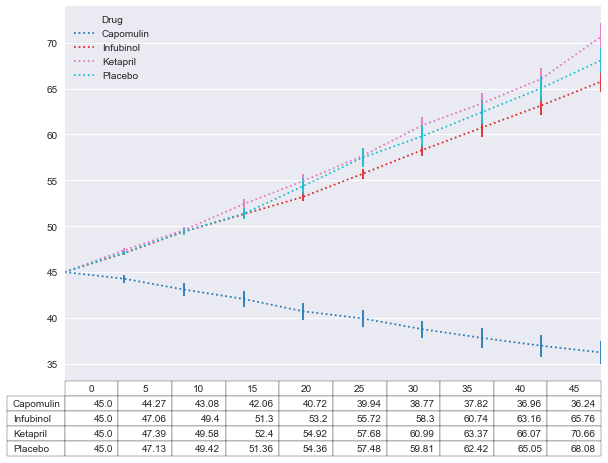

In [356]:
from matplotlib import cm
fig, ax = plt.subplots(1, 1)
ax.get_xaxis().set_visible(False)   # Hide Ticks
df_tumor_mean.plot(table=np.round(df_tumor_mean.T, 2),yerr =df_tumor_sem , colormap=cm.tab10,linestyle=':',ax=ax)
plt.tight_layout()
plt.show();

## ============================================================================

Creating a scatter plot that shows how the number of metastatic (cancer spreading) sites changes over time for each treatment.

In [357]:
df_meta = df.groupby(['Drug','Timepoint']).agg({'Metastatic Sites':[np.mean,sem]}).unstack(level=0)
df_meta_mean = df_meta['Metastatic Sites']['mean'][drugs]
df_meta_sem = df_meta['Metastatic Sites']['sem'][drugs]

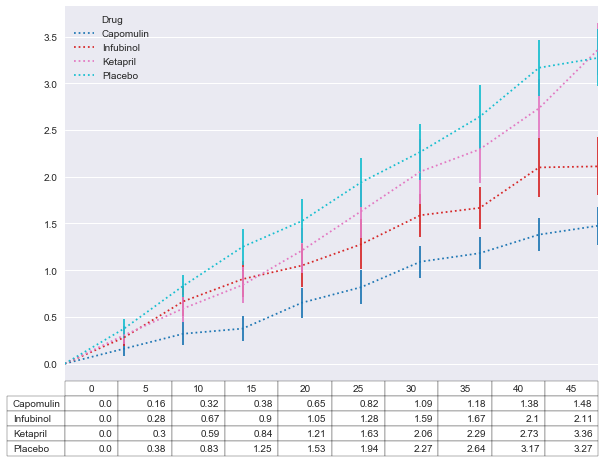

In [358]:
from matplotlib import cm
fig, ax = plt.subplots(1, 1)
ax.get_xaxis().set_visible(False)   # Hide Ticks
df_meta_mean.plot(table=np.round(df_meta_mean.T, 2),yerr =df_meta_sem , colormap=cm.tab10,linestyle=':',ax=ax)
plt.tight_layout()
plt.show();

## ============================================================================

Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)

In [373]:
summary_mice = df.groupby(['Drug','Timepoint']).agg({'Mouse ID':'count'}).unstack(level=0)
summary_mice = summary_mice['Mouse ID'][drugs]
summary_mice

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19
25,22,18,19,17
30,22,17,18,15
35,22,12,17,14
40,21,10,15,12


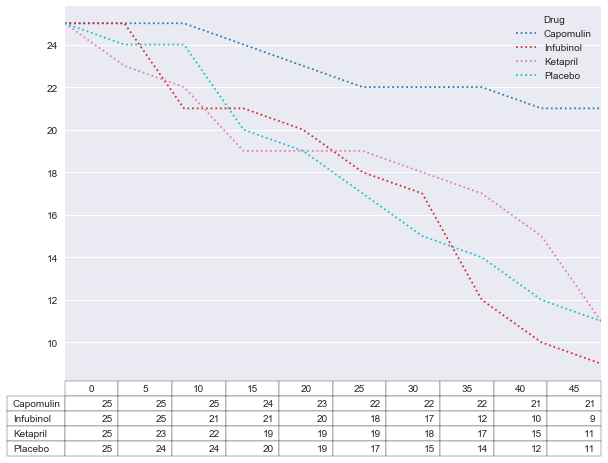

In [374]:
from matplotlib import cm
fig, ax = plt.subplots(1, 1)
ax.get_xaxis().set_visible(False)   # Hide Ticks
summary_mice.plot(table=np.round(summary_mice.T, 2), colormap=cm.tab10,linestyle=':',ax=ax)
plt.tight_layout()
plt.show();

## ============================================================================

Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.

In [375]:
summary_tumor_change = df.groupby(['Drug','Timepoint']).agg({'Tumor Volume (mm3)': np.mean}).unstack()
summary_tumor_change['change']=(summary_tumor_change['Tumor Volume (mm3)'][45]-summary_tumor_change['Tumor Volume (mm3)'][0])/summary_tumor_change['Tumor Volume (mm3)'][0]
summary_tumor_change = summary_tumor_change['change'][drugs]
summary_tumor_change

Drug
Capomulin   -0.194753
Infubinol    0.461235
Ketapril     0.570288
Placebo      0.512980
Name: change, dtype: float64

In [376]:
color = []
for drug in summary_tumor_change:
    if drug<=0:
        color.append('red')
    else:
        color.append('green')

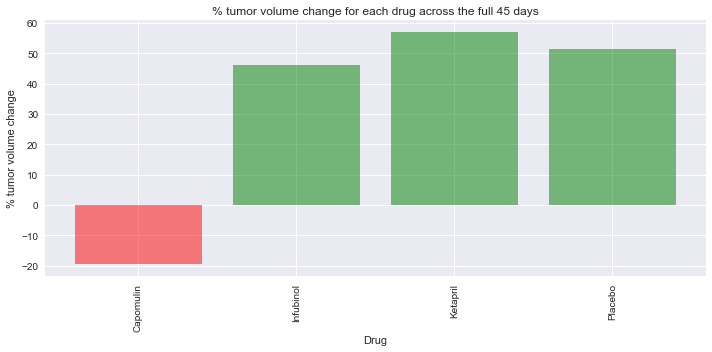

In [377]:
plt.figure(figsize=(10,5))
x_axis = np.arange(len(summary_tumor_change.index))
tick_locations = [value+0.4 for value in x_axis]
plt.bar(x_axis,summary_tumor_change*100,align="edge",alpha=0.5,color=color)
plt.xticks(tick_locations,summary_tumor_change.index , rotation="vertical")
plt.title("% tumor volume change for each drug across the full 45 days")
plt.ylabel('% tumor volume change')
plt.xlabel('Drug')
plt.tight_layout()
plt.show()

Observations

        We can clearly see that out of the four treatments, only the capomulin based treatment resulted in the least amount of fatalties. It also was effective in reducing the tumor volume on average. 